## <center>  Секрет богатства

** В этом задании поработаем с данными о переписи населения [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). **

<img src="http://memesmix.net/media/created/76upq4.jpg" width=600px/>


Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, sep=", ")

C:\Users\lisa-\AppData\Local\Temp\ipykernel_8424\1827062682.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, sep=", ")


In [6]:
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
               "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [471]:
# функция для подсчета процента

def percent(amount, total):
    return round(amount / total * 100, 2)

---

**1. Сколько женщин и сколько мужчин (признак *sex*) представлено в этом датасете?** 

- а) 21790 женщин and 10771 мужчин
- б) 16346 мужчин and 12532 женщин
- в) 21790 мужчин and 10771 женщин
- г) 16346 женщин and 12532 мужчин

In [52]:
women, men = data[data['sex'] == "Female"], data[data['sex'] == "Male"]

In [82]:
len(men), len(women)

(21790, 10771)

In [218]:
data['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

**Ответ:**

в) 21790 мужчин и 10771 женщин

---

**2. Какой средний возраст женщин (признак *age*)?**

- а) 34.67
- б) 35.95
- в) 36.86
- г) 37.04

In [223]:
women.age.mean().round(2)

36.86

In [224]:
data.groupby('sex')['age'].mean().round(2)

sex
Female    36.86
Male      39.43
Name: age, dtype: float64

**Ответ:** 

в) 36.86

---

**3. Какой процент граждан Германии (признак *native-country*)?**

- а) 1.13
- б) 0.42
- в) 1.42
- г) 0.36

In [87]:
germans = data[data['native-country'] == 'Germany']

In [473]:
percent_ger = percent(len(germans), len(data))
percent_ger

0.42

**Ответ:**

б) 0.42

---

**4-5. Найдите математическое ожидание и стандартное отклонение возрата тех, кто зарабатывает больше 50 тысяч в год (признак *salary*) и тех, кто зарабатывает меньше 50 тычяч в год?**

Больше: 
- а) 45 +- 9.5 лет
- б) 42 +- 11.5 лет
- в) 41 +- 12.5 лет
- г) 44 +- 10.5 лет

Меньше:
- а) 37 +- 14 лет
- б) 38 +- 14 лет
- в) 39 +- 15 лет
- г) 40 +- 15 лет

In [197]:
more, less = data[data['salary'] == '>50K'], data[data['salary'] == '<=50K']
amt_more, amt_less = len(more), len(less)

In [235]:
(more.age.sum() / amt_more).round(), more.age.std().round(1)

(44.0, 10.5)

In [237]:
(less.age.sum() / amt_less).round(), less.age.std().round()

(37.0, 14.0)

**Ответ:**

Больше:
г) 44 +- 10.5 лет

Меньше: 
а) 37 +- 14 лет

---

**6. Правда ли, что те, кто зарабатывает больше 50 тысяч в год имеют по меньшей мере законченное школьное образование**

- а) Да
- б) Нет

In [184]:
# так как не указано какое образование считается законченным школьным, я отнесла к незаконченному школьному образованию 
# дошкольное и все школьные классы до 12, так как 12 класс в разных странах либо выпускной класс, либо предвыпускной, 
# все остальные значения считаются как законченное школьное образование

school, graduate = data[data['education-num'] < 8], data[data['education-num'] >= 8]

In [474]:
# среди тех, кто зарабатыыает больше 50 тысяч в год

# процент людей с незаконченным школьным образованием
more_scl = percent(more.education.isin(school.education).sum(), amt_more)

# процент людей с законченным школьным образованием
more_grd = percent(more.education.isin(graduate.education).sum(), amt_more)

more_scl, more_grd

(2.69, 97.31)

In [476]:
# среди тех, кто зарабатыыает меньше 50 тысяч в год

# процент людей с незаконченным школьным образованием
less_scl = percent(less.education.isin(school.education).sum(), amt_less)

# процент людей с законченным школьным образованием
less_grd = percent(less.education.isin(graduate.education).sum(), amt_less)

less_scl, less_grd

(14.6, 85.4)

**Ответ:** 

Так как 97% людей с заплатой больше 50 тысяч в год имеют законченное школьное образование, то можно ответить

а) да

---

**7. Выведите статистику для каждой расы (признак *race*) и каждого пола. Используйте *groupby()* и *describe()*. Найдите максимальый возраст представителя расы*Amer-Indian-Eskimo*.**

- а) 78
- б) 82
- в) 87
- г) 88



In [249]:
# статистика для каждой расы и каждого пола

data.groupby('race')['sex'].describe()

,count,unique,top,freq
race,,,,
Amer-Indian-Eskimo,311,2,Male,192
Asian-Pac-Islander,1039,2,Male,693
Black,3124,2,Male,1569
Other,271,2,Male,162
White,27816,2,Male,19174


In [337]:
data[data.race == 'Amer-Indian-Eskimo']['age'].max()

82

**Ответ:**

Максимальый возраст представителя расы Amer-Indian-Eskimo

б) 82

---

**8. Среди кого доля зарабатывающих больше 50 тысяч в год больше: женатые или одинокие мужчины (признак семейный статус *marital-status*)? Будем считать женатыми всех, чей семейный статус начинается с *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), остальных будем считать холостяками.**

- а) Среди женатых
- б) Среди холостых

In [410]:
# набор обозначений семейных статусов женатых мужчин
married_statuses = {row['marital-status'] for i, row in more.iterrows() if row['marital-status'].startswith('Married')}

In [426]:
# оставляем только мужчин, среди зарабатывающих больше 50 тысяч в год больше
more_men = more[more['sex'] == 'Male']
more_men_amt = len(more_men)

In [427]:
# количество женатых мужчин, зарабатывающих больше 50 тысяч в год больше
married_men = more_men['marital-status'].isin(married_statuses).sum()

# количество неженатых мужчин, зарабатывающих больше 50 тысяч в год больше
no_married_men = (~ more_men['marital-status'].isin(married_statuses)).sum()

In [477]:
# процент женатых мужчин среди мужчин, зарабатывающих больше 50 тысяч в год больше
married = percent(married_men, more_men_amt)

# процент неженатых мужчин среди мужчин, зарабатывающих больше 50 тысяч в год больше
no_married = percent(no_married_men, more_men_amt)

married, no_married

(89.54, 10.46)

**Ответ:**

Процент женатых мужчин, среди зарабатывающих больше 50 тысяч в год, больше процента неженатых мужчин.

а) Среди женатых

---

**9. Какое наибольшее число рабочих часов в неделю? (*hours-per-week* feature)? Сколько людей работает столько часов и какой процент среди них тех, кто зарабатывает больше 50 тысяч?**

- а) 102 hours/week, 20 people, 41% are rich
- б) 99 hours/week, 95 people, 30% are rich
- в) 99 hours/week, 85 people, 29% are rich
- г) 90 hours/week., 70 people, 34% are rich

In [480]:
# наибольшее число рабочих часов в неделю
most_hours = data['hours-per-week'].max()

In [481]:
# люди, работающие наибольшее число рабочих часов в неделю
hard_workers = data[data['hours-per-week'] == most_hours]

# количество людей, работающих наибольшее число рабочих часов в неделю
hard_workers_amt = len(hard_workers)

In [482]:
# процент людей, зарабатыващих больше 50 тысяч в год, среди людей, работающих наибольшее число рабочих часов в неделю
rich = percent(hard_workers.salary.isin(more.salary).sum(), hard_workers_amt)

In [483]:
most, hard_workers_amt, rich

(99, 85, 29.41)

**Ответ:**

в) 99 hours/week, 85 people, 29% are rich

---

**10. Посчитайте среднее число рабочих часов среди тех, кто зарабатывает мало и много для каждой страны (*native-country*). Какие значения для Японии?**

- а) 41 и 48
- б) 46 и 43
- в) 44 и 48
- г) 41 и 40

In [523]:
# среднее число рабочих часов среди тех, кто зарабатывает мало (<=50K в год) для каждой страны
less_hours = pd.DataFrame(less.groupby('native-country')['hours-per-week'].mean().round())

In [524]:
less_hours

,hours-per-week
native-country,
?,40.0
Cambodia,41.0
Canada,38.0
China,37.0
Columbia,39.0
Cuba,38.0
Dominican-Republic,42.0
Ecuador,38.0
El-Salvador,36.0


In [525]:
# среднее число рабочих часов среди тех, кто зарабатывает много (>50K в год) для каждой страны
more_hours = pd.DataFrame(more.groupby('native-country')['hours-per-week'].mean().round())

In [526]:
more_hours

,hours-per-week
native-country,
?,46.0
Cambodia,40.0
Canada,46.0
China,39.0
Columbia,50.0
Cuba,42.0
Dominican-Republic,47.0
Ecuador,49.0
El-Salvador,45.0


In [538]:
# среднее число рабочих часов среди тех, кто зарабатывает мало (<=50K в год) в Японии
less_hours.loc[['Japan'], ['hours-per-week']]

,hours-per-week
native-country,
Japan,41.0


In [544]:
# среднее число рабочих часов среди тех, кто зарабатывает много (>50K в год) в Японии
more_hours.loc[['Japan'], ['hours-per-week']]

,hours-per-week
native-country,
Japan,48.0


**Ответ:**

а) 41 и 48

---

**11. Давайте посмотрим на графики распределения некоторых значений**

In [545]:
import matplotlib.pyplot as plt

Посмотрим на гистограмму значений `hours-per-week`. Какое значение встречается чаще всего?

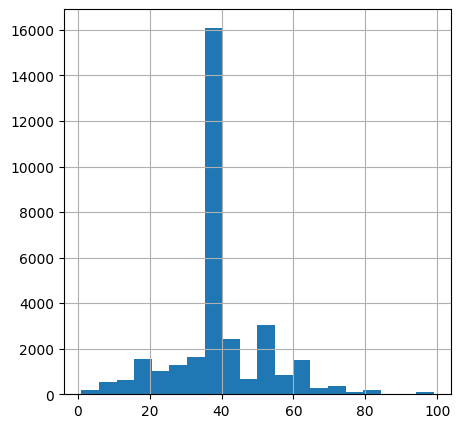

In [621]:
data['hours-per-week'].hist(figsize=(5,5), bins=20) # hist с опциональным аргументом bins для количества бинов гистограммы. 
plt.show()

**Ответ:**

Чаще всего встречается значение в 40 часов работы в неделю. Проверим подсчетом уникальных значений:

In [651]:
data['hours-per-week'].value_counts()[:5]

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
Name: count, dtype: int64

In [ ]:
# 40 часов работы в неделю превышает по количеству 50 часов в неделю очень резко в несколько раз.

Постройте гистограмму для значений возраста. Есть ли однозначный пик у этого распределения?

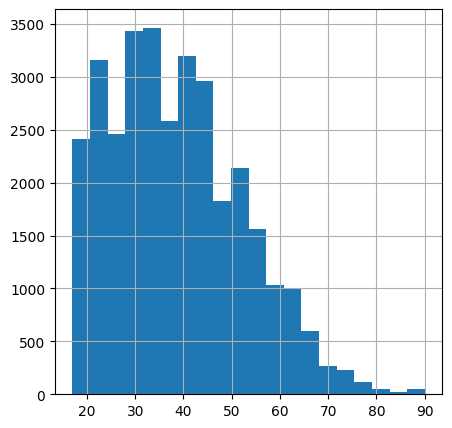

In [625]:
# гистограмма для значений возраста

data['age'].hist(figsize=(5,5), bins=20)
plt.show()

**Ответ:**

По гистограмме однозначный пик распределения для значений возраста не наблюдается. Проверим:

In [650]:
data['age'].value_counts().head(5)

age
36    898
31    888
34    886
23    877
35    876
Name: count, dtype: int64

Выделяющиеся самое большое значение, как в слуае с часами работы в неделю, отсуствует.

---

**12. Посмотрим на более детальную гистограмму, используя [sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) из библиотеки seaborn**

In [660]:
import seaborn as sns

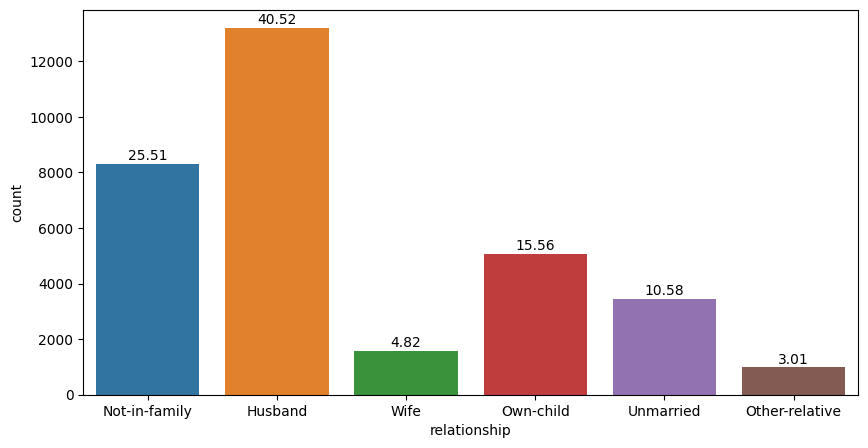

In [697]:
total = float(len(data))
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="relationship", data=data) # число наблюдений для каждого категориального значения
for p in ax.patches:
    height = p.get_height() # количество наблюдений в категории
    ax.text(p.get_x() + p.get_width() / 2, 
            height + 150,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
plt.show()


Постройте подобный график для колонки `workclass` и `education`. Какие выводы можно сделать, глядя на эти графики?

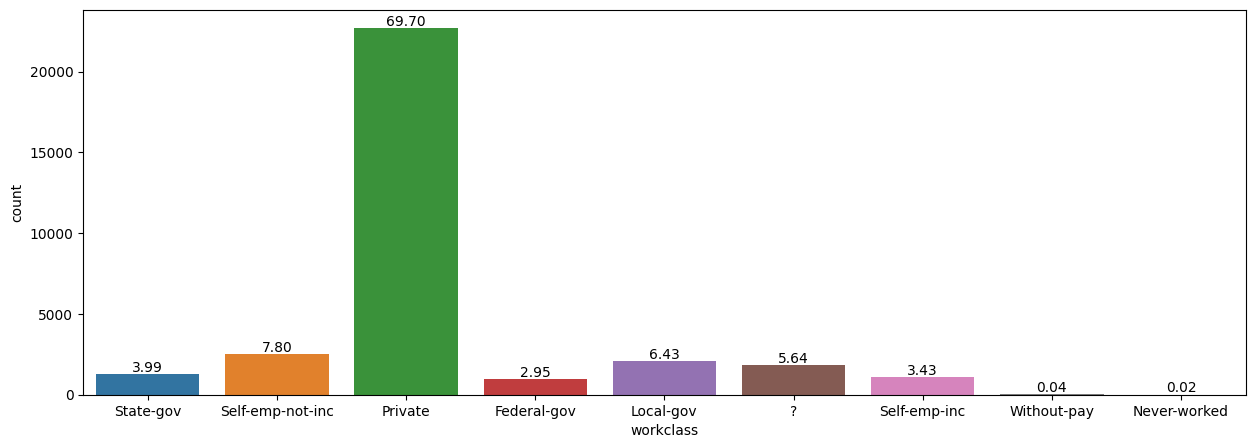

In [718]:
# график для колонки workclass

total = float(len(data))
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="workclass", data=data) # число наблюдений для каждого категориального значения
for p in ax.patches:
    height = p.get_height() # количество наблюдений в категории
    ax.text(p.get_x() + p.get_width() / 2, 
            height + 150,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
plt.show()

**Ответ:**

По графику колонки "workclass" можно сказать

- 70% людей в выборке работает на частные компании или влаеет им
- 13% работают в госудственном или местном управлении
- 11% имеют статус самозанятых
- вид рабочей деятельности неизвестен для около 6%
- почти нет неработающих людей и людей, работающих на неполачиваемой работе.

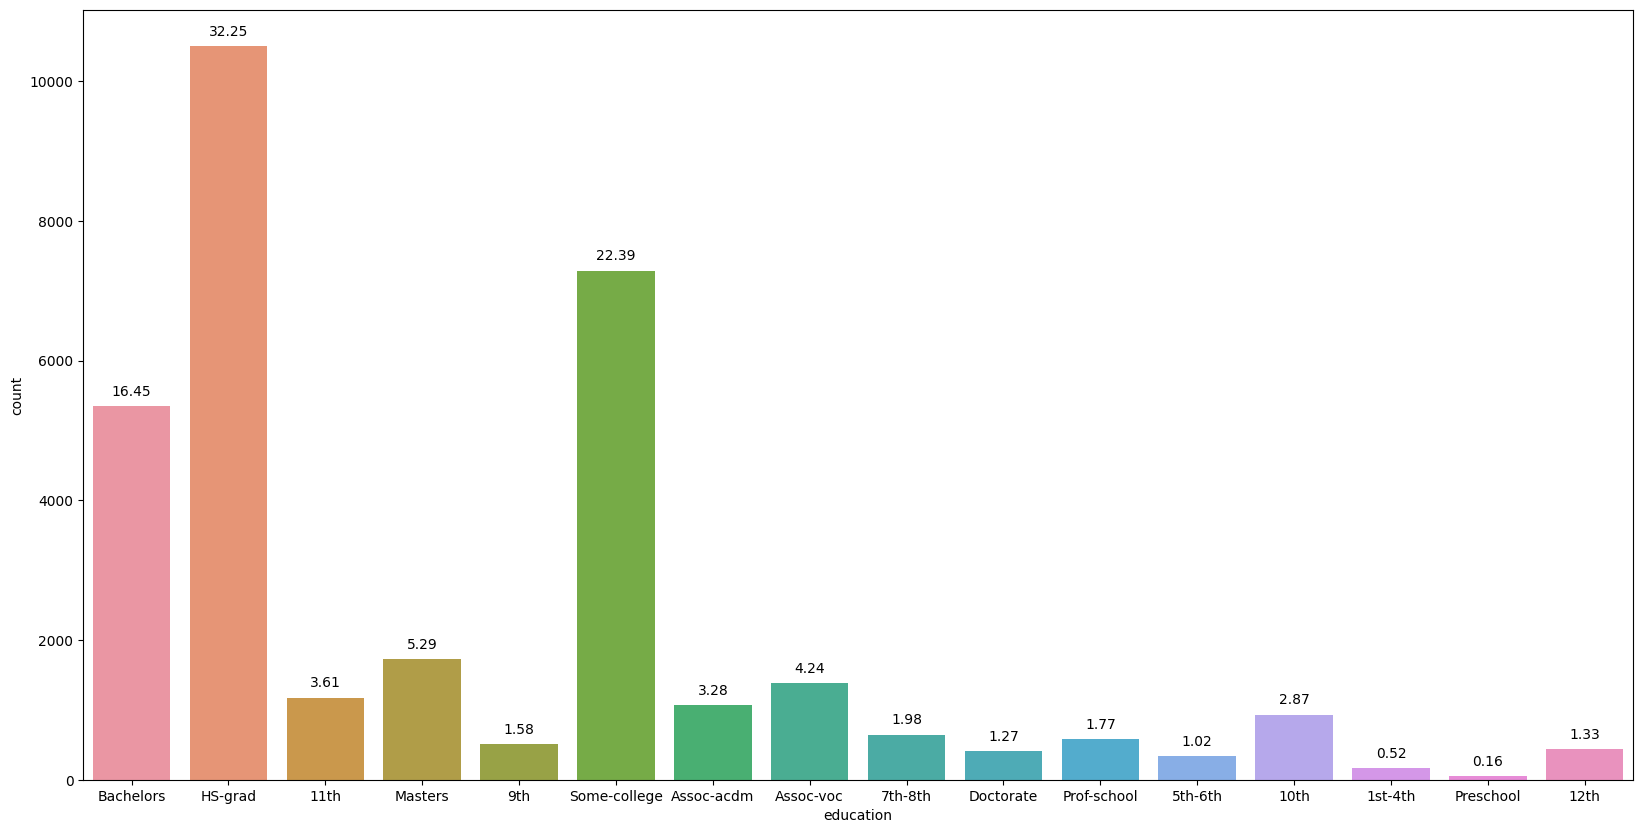

In [716]:
# график для колонки education

total = float(len(data))
plt.figure(figsize=(20, 10))

ax = sns.countplot(x="education", data=data) # число наблюдений для каждого категориального значения
for p in ax.patches:
    height = p.get_height() # количество наблюдений в категории
    ax.text(p.get_x() + p.get_width() / 2, 
            height + 150,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
plt.show()

**Ответ:**

По графику колонки "education" можно сказать

- треть людей в выборке закончили среднюю школу
- 22% отучились в колледже
- 16% людей получили степень бакалавра
- 11% имеют незаконченное школьное образование
- 9% отучились в профшколах и получили сретификаты на разные профессии
- 6-7% имеют академические степени

и меньше процента тех, кто не получил начального школьного образования.